In [1]:
!pip install umap-learn

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import umap
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/car_rental_dataset.csv')
print(df.head())
print(df.info())

   Car ID Car Brand    Car Model  Year of Manufacture  Rental Price per Day  \
0       1     Honda  Convertible                 2006                 72.18   
1       2    Nissan  Convertible                 2010                 96.04   
2       3       BMW  Convertible                 2009                 68.05   
3       4    Nissan  Convertible                 2008                 79.49   
4       5    Nissan        Truck                 2013                 60.50   

   Location  Mileage Fuel Type Transmission Type Availability  
0  New York   162971    Diesel            Manual          Yes  
1     Miami    32083  Electric            Manual          Yes  
2  New York    67708    Hybrid            Manual           No  
3  New York   111462  Electric            Manual           No  
4   Chicago   147735    Diesel         Automatic           No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null

In [10]:
label_encoders = {}
for column in ['Car Brand', 'Car Model', 'Location', 'Fuel Type', 'Transmission Type', 'Availability']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [12]:
features = df.drop(columns=['Car ID'])

In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

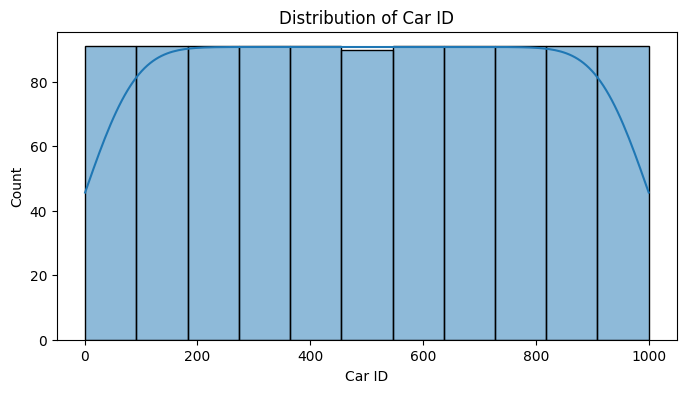

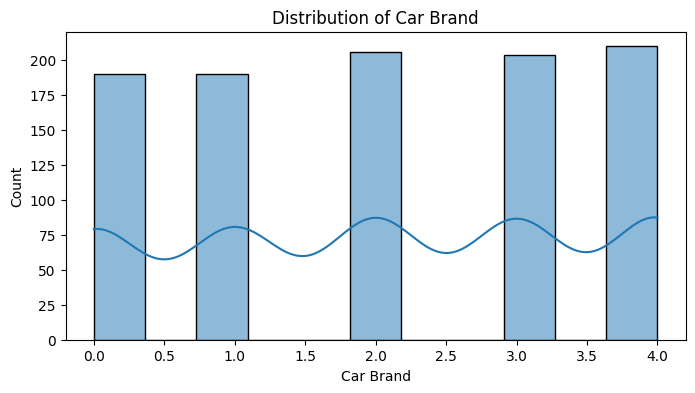

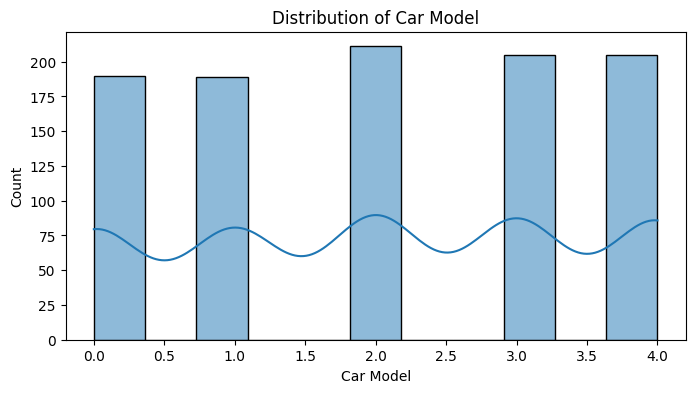

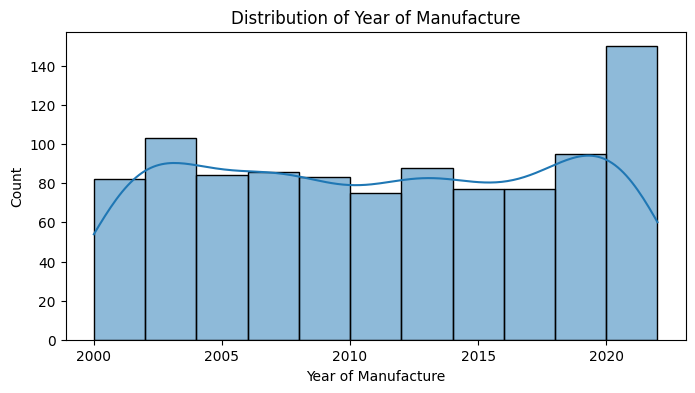

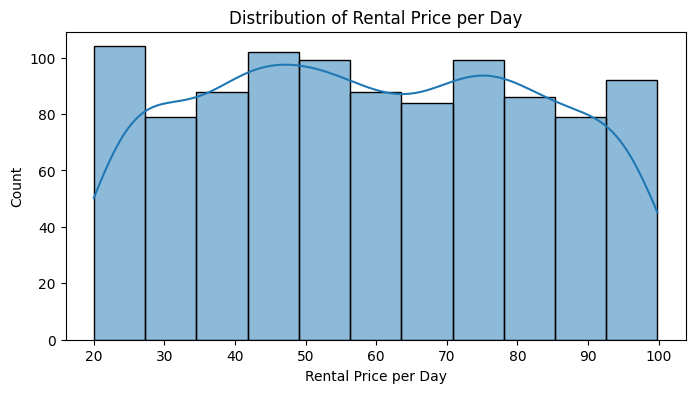

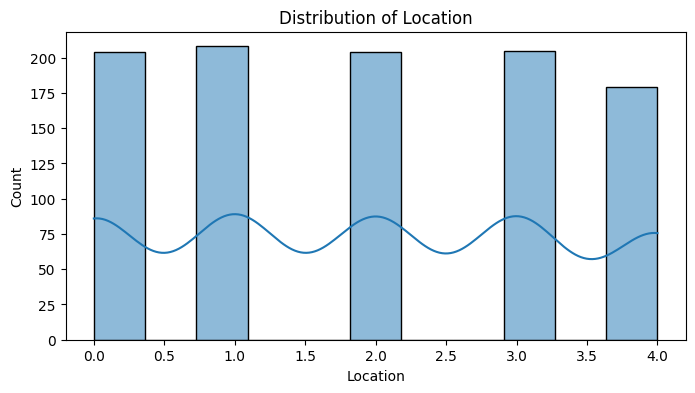

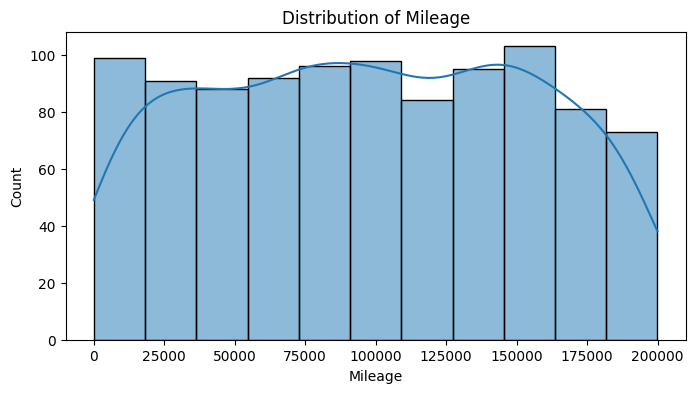

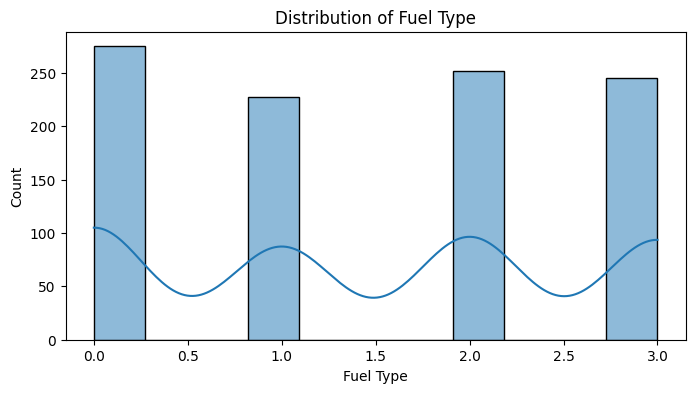

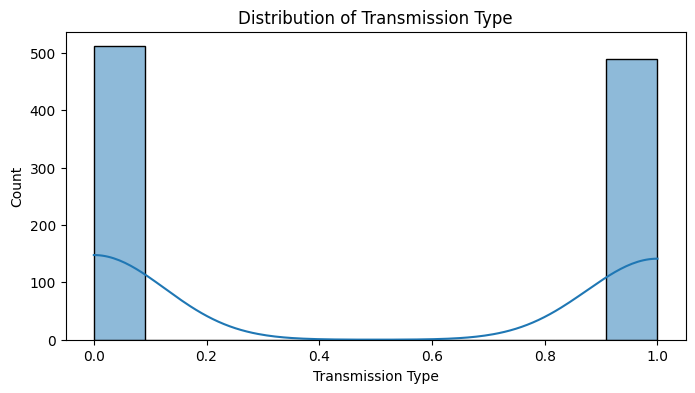

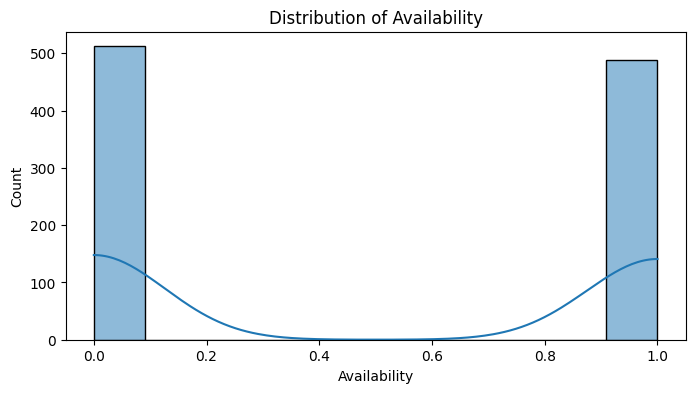

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns for visualization
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plotting distributions
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

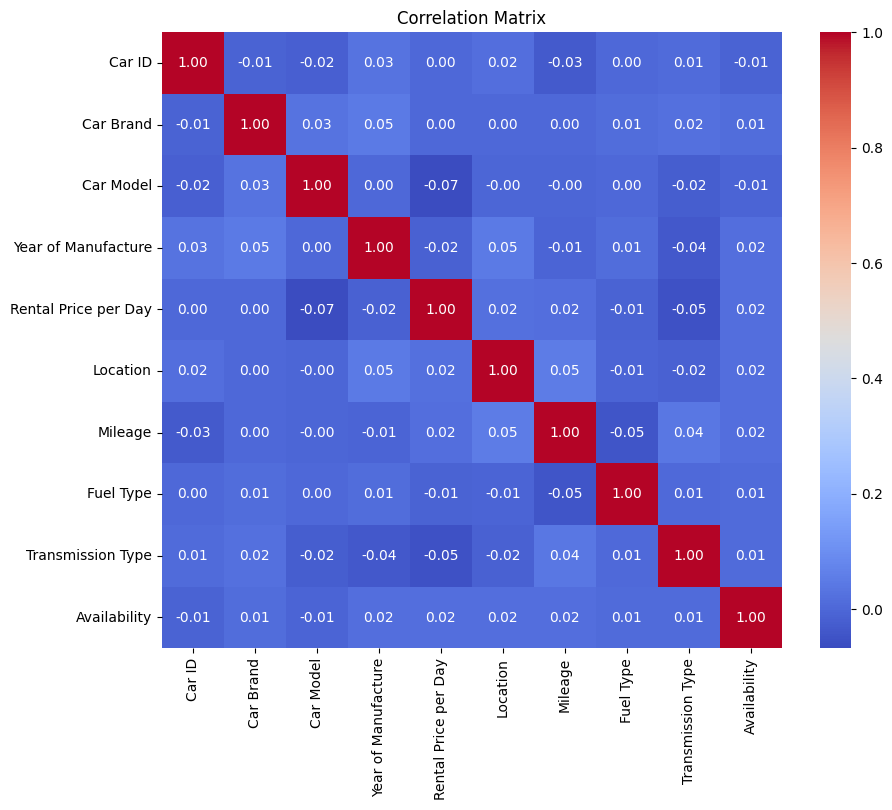

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

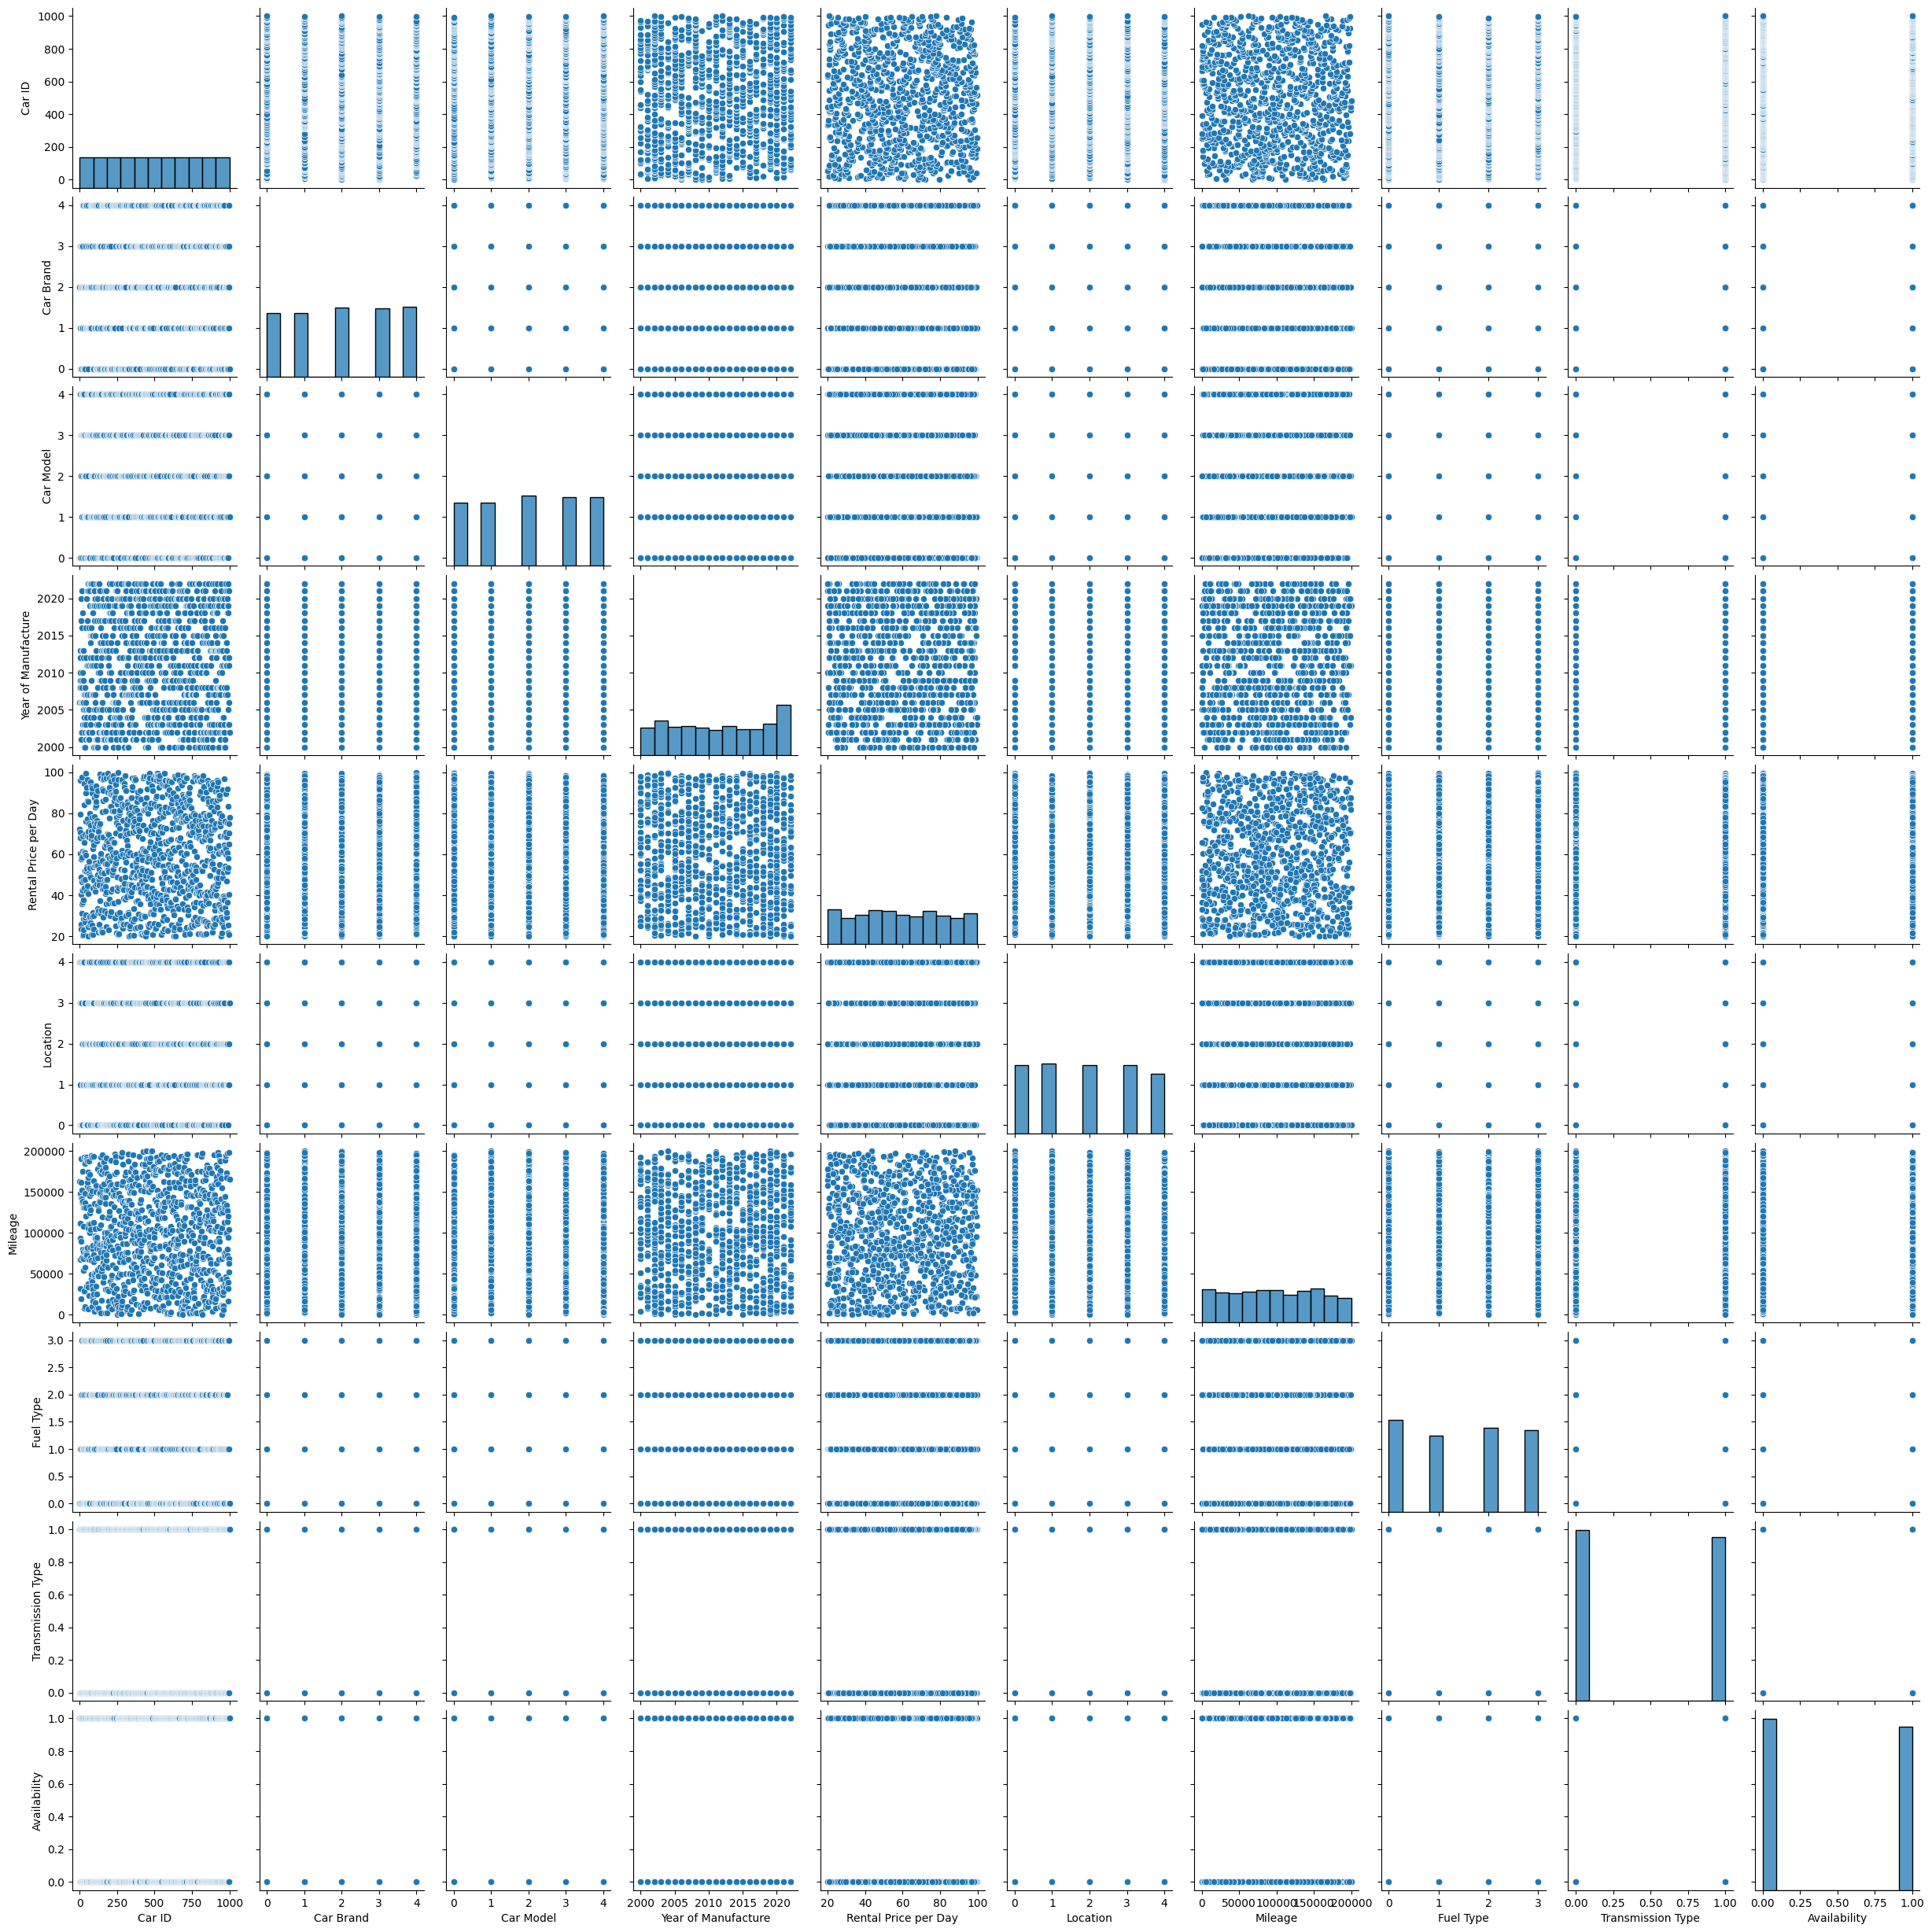

In [16]:
sns.pairplot(df[numerical_columns])
plt.show()

In [20]:
umap_reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(scaled_features)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


plt.scatter(umap_result[:, 0], umap_result[:, 1], alpha=0.8)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP Dimensionality Reduction')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(umap_result)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


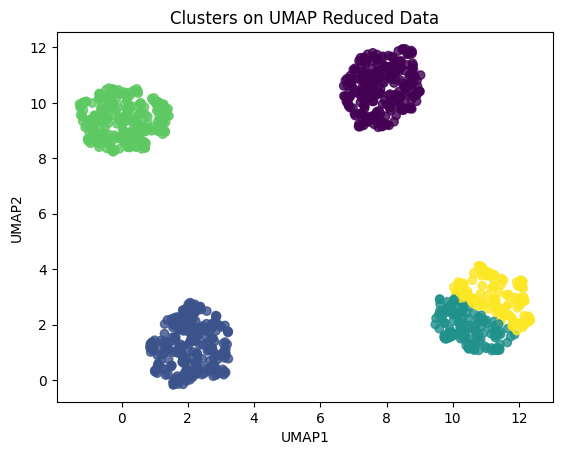

In [23]:
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=clusters, alpha=0.8)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('Clusters on UMAP Reduced Data')
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(umap_result, clusters, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        61
           2       1.00      0.96      0.98        23
           3       1.00      1.00      1.00        45
           4       0.97      1.00      0.98        29

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



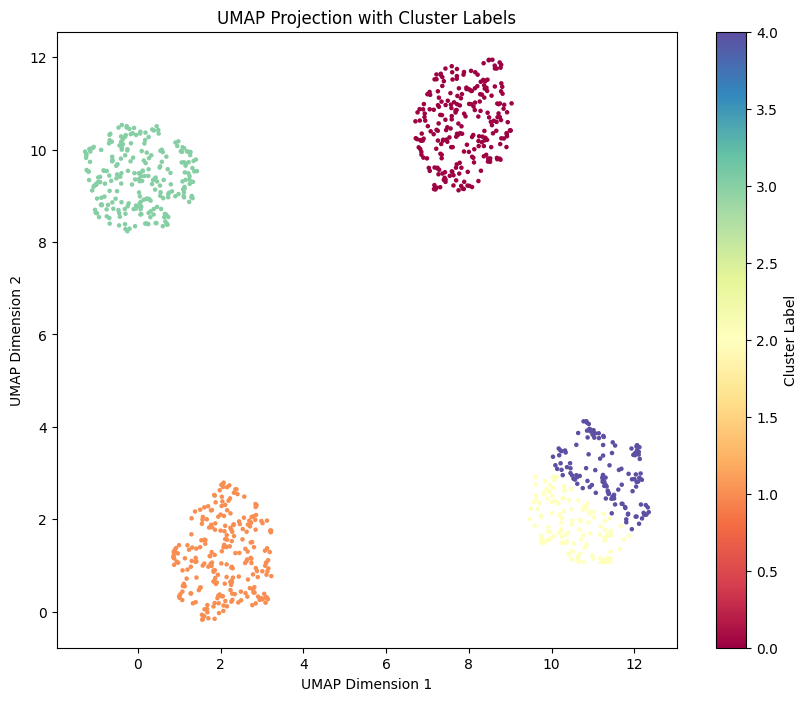

In [25]:
# Visualize UMAP Results
plt.figure(figsize=(10, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=clusters, cmap='Spectral', s=5)
plt.colorbar(label='Cluster Label')
plt.title('UMAP Projection with Cluster Labels')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

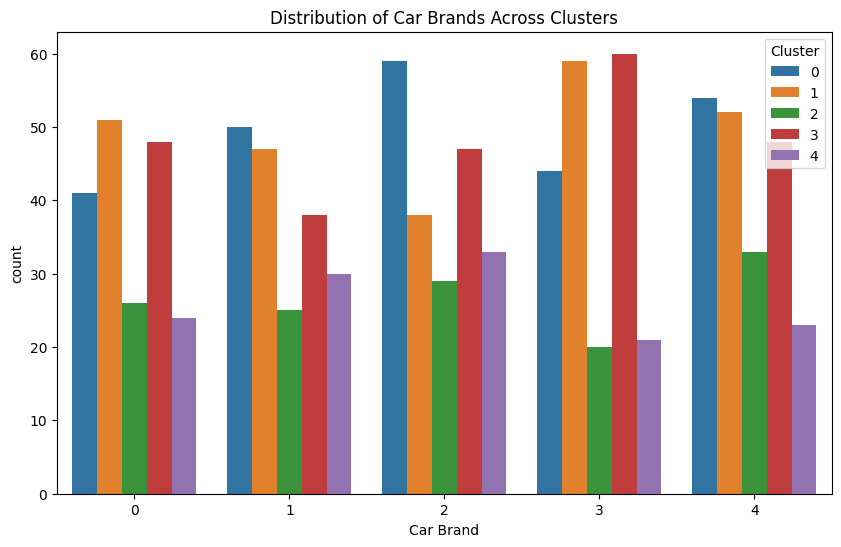

In [27]:
# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Count plot for an original feature categorized by clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Car Brand', hue='Cluster', data=df)
plt.title('Distribution of Car Brands Across Clusters')
plt.show()

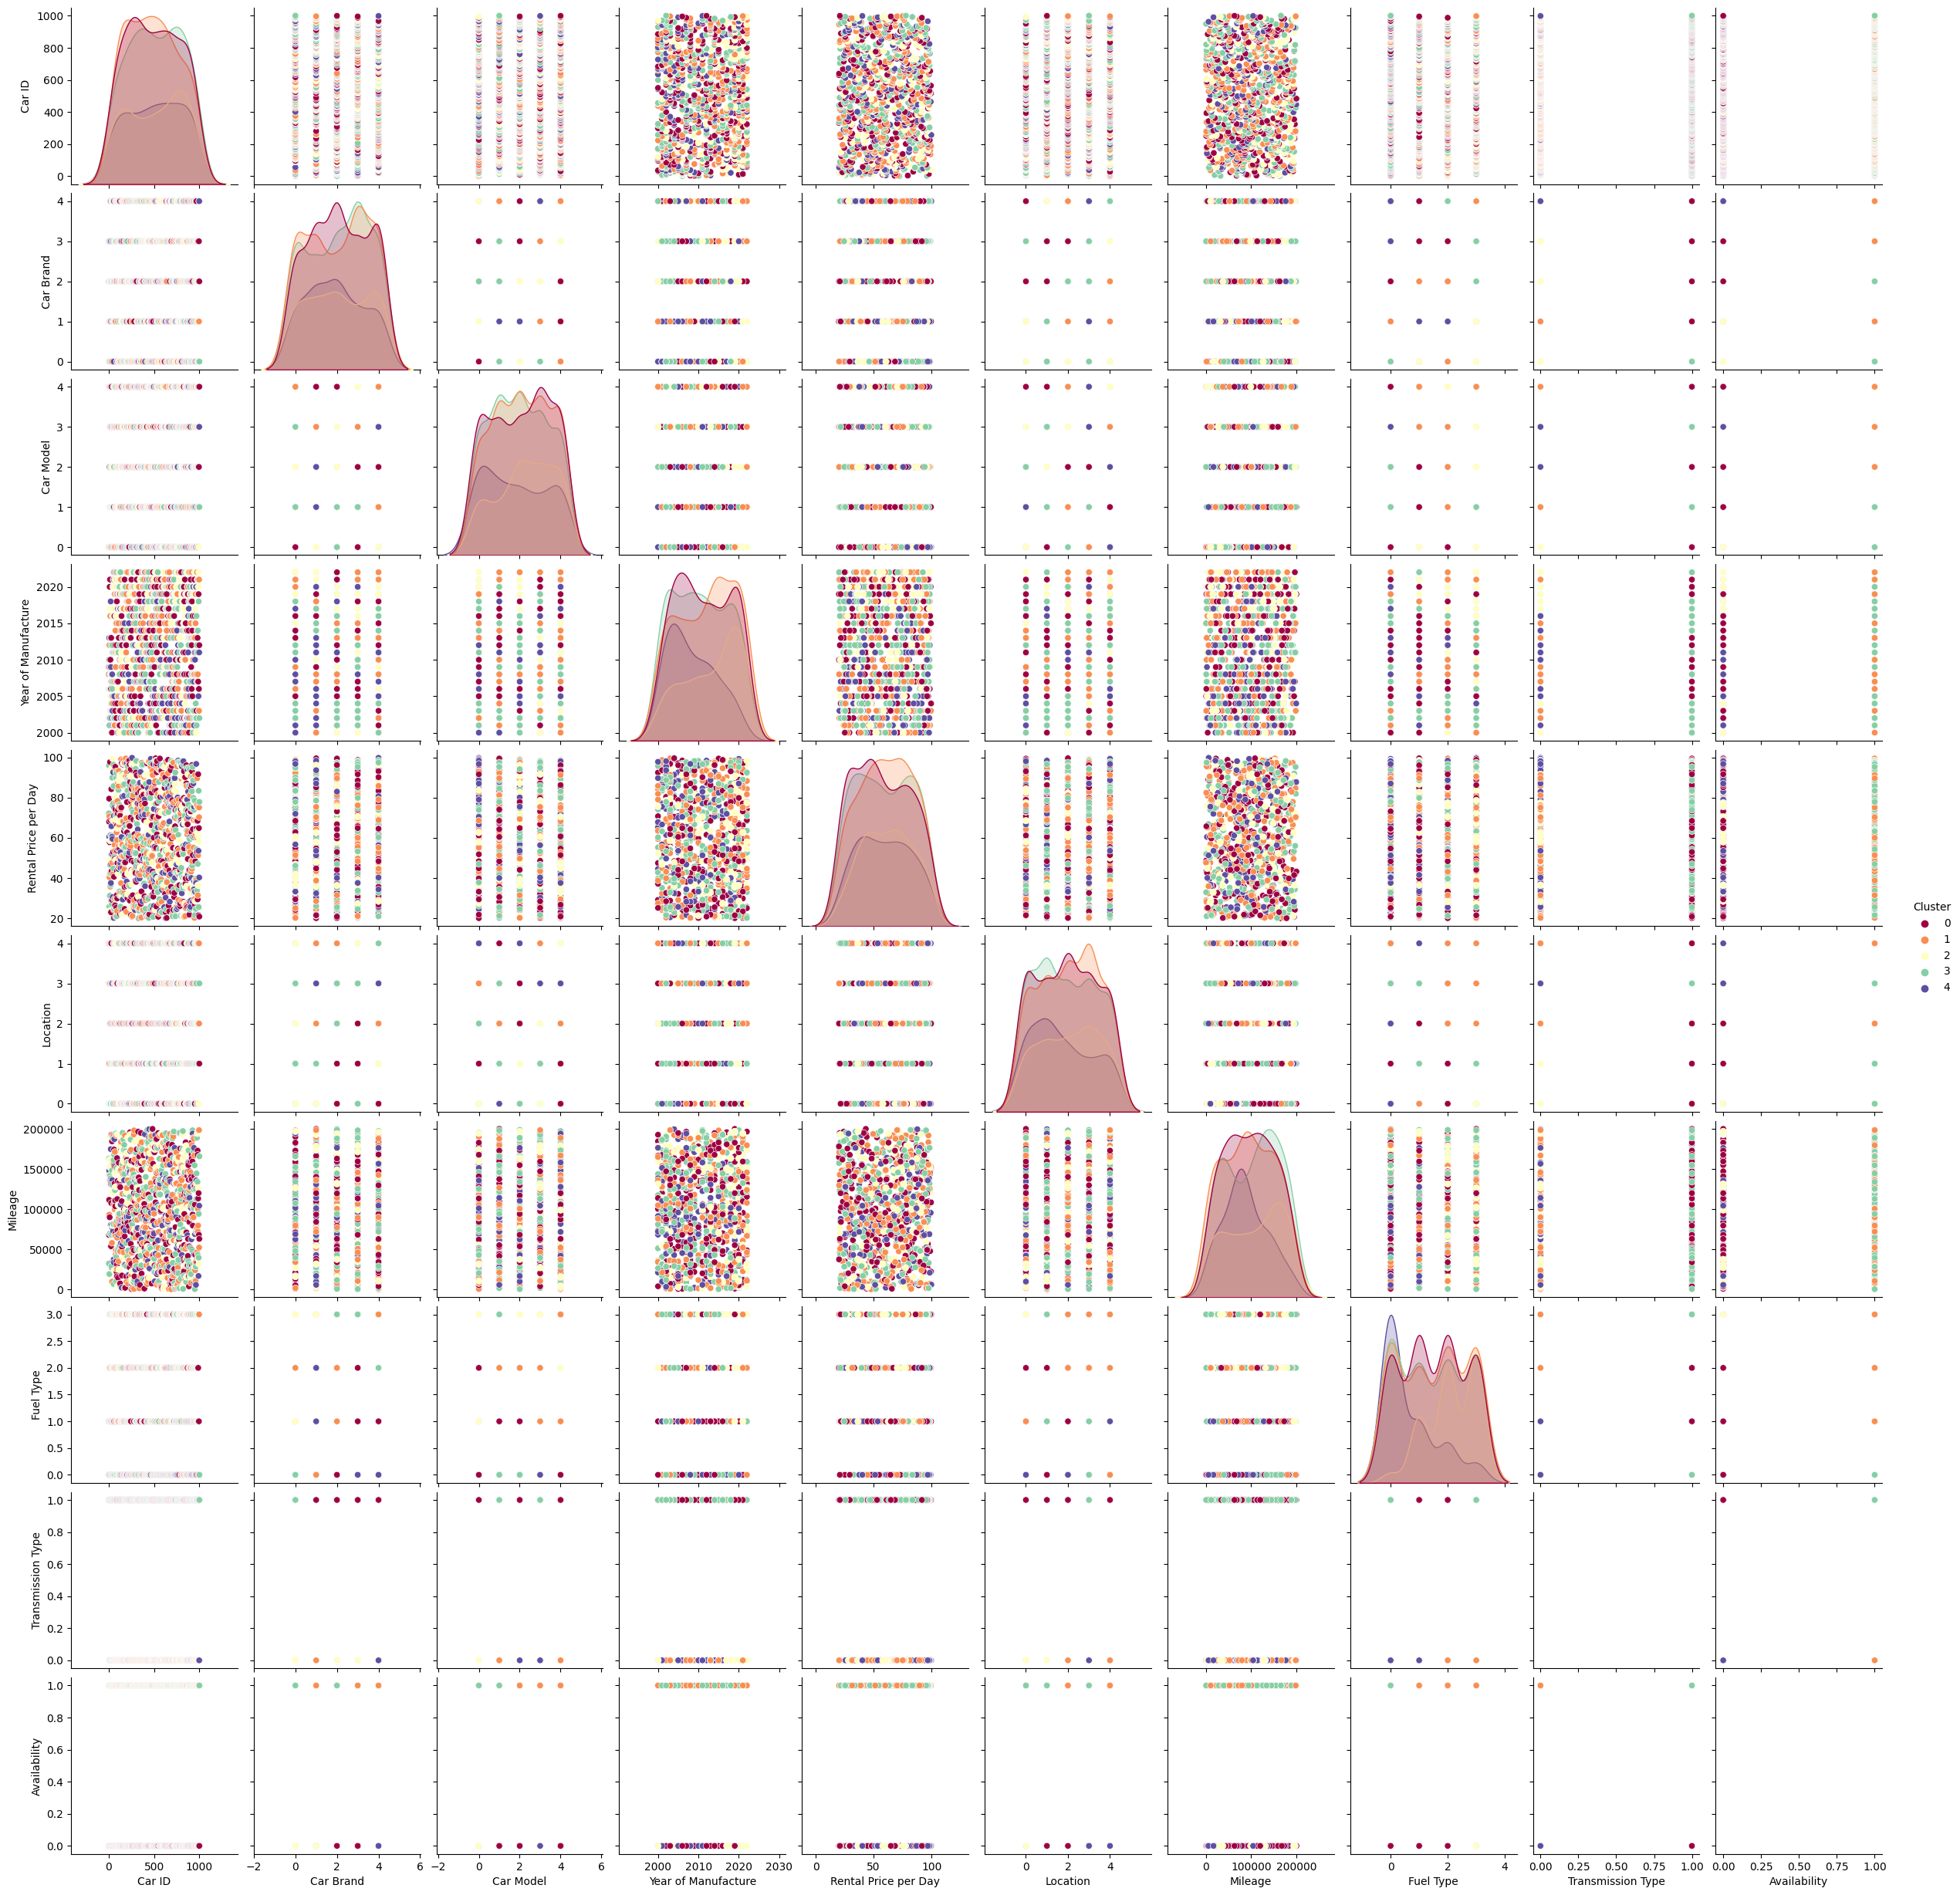

In [28]:
sns.pairplot(df, vars=numerical_columns, hue='Cluster', palette='Spectral')
plt.show()

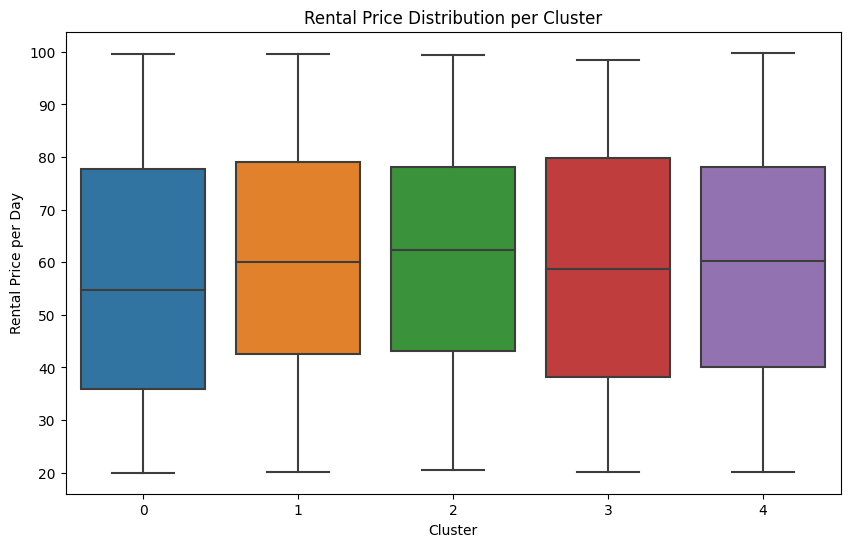

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Rental Price per Day', data=df)
plt.title('Rental Price Distribution per Cluster')
plt.show()